In [ ]:
# https://comptools.climatematch.io/tutorials/W1D1_ClimateSystemOverview/student/W1D1_Tutorial6.html

## 
compute climatology weekly



## Climatology  (sea ice thickness)

* compute weekly time series for 2013 and 2023 and compare
* compute anomalies between 2013 and 2023
* compute trends between 2013 and 2023






In [1]:
import xarray as xr
erddap_url = "https://polarwatch.noaa.gov/erddap/griddap/ncei_polarAPPX20_nhem"
ds = xr.open_dataset(erddap_url)
ds

<xarray.Dataset> Size: 309GB
Dimensions:                                    (time: 29685, rows: 361,
                                                columns: 361)
Coordinates:
  * time                                       (time) datetime64[ns] 237kB 19...
  * rows                                       (rows) float32 1kB -4.5e+06 .....
  * columns                                    (columns) float32 1kB -4.525e+...
Data variables: (12/20)
    cdr_sea_ice_thickness                      (time, rows, columns) float32 15GB ...
    cdr_surface_temperature                    (time, rows, columns) float32 15GB ...
    cdr_surface_albedo                         (time, rows, columns) float32 15GB ...
    cdr_surface_downwelling_shortwave_flux     (time, rows, columns) float32 15GB ...
    cdr_surface_downwelling_longwave_flux      (time, rows, columns) float32 15GB ...
    cdr_surface_upwelling_shortwave_flux       (time, rows, columns) float32 15GB ...
    ...                                         ...
    cloud_optical_depth                        (time, rows, columns) float32 15GB ...
    cloud_top_pressure                         (time, rows, columns) float32 15GB ...
    cloud_top_temperature                      (time, rows, columns) float32 15GB ...
    cloud_type                                 (time, rows, columns) float32 15GB ...
    surface_shortwave_cloud_radiative_forcing  (time, rows, columns) float32 15GB ...
    surface_longwave_cloud_radiative_forcing   (time, rows, columns) float32 15GB ...
Attributes: (12/44)
    _NCProperties:              version=2,netcdf=4.8.1,hdf5=1.10.6
    acknowledgement:            Please acknowledge NCEI, CoastWatch West Coas...
    cdm_data_type:              Grid
    cdr_program:                NOAA Climate Data Record Program for satellites
    cdr_variable:               cdr_surface_temperature, cdr_surface_albedo, ...
    comment:                    In order to be compliant with the EASE Grid s...
    ...                         ...
    spatial_resolution:         25 km
    standard_name_vocabulary:   CF Standard Name Table (v26, 08 November 2013)
    summary:                    summary
    time_coverage_end:          2024-08-28T14:00:00Z
    time_coverage_start:        1982-01-01T04:00:00Z
    title:                      Sea Ice Thickness and Multi-variable Extended...

In [2]:
ds


<xarray.Dataset> Size: 309GB
Dimensions:                                    (time: 29685, rows: 361,
                                                columns: 361)
Coordinates:
  * time                                       (time) datetime64[ns] 237kB 19...
  * rows                                       (rows) float32 1kB -4.5e+06 .....
  * columns                                    (columns) float32 1kB -4.525e+...
Data variables: (12/20)
    cdr_sea_ice_thickness                      (time, rows, columns) float32 15GB ...
    cdr_surface_temperature                    (time, rows, columns) float32 15GB ...
    cdr_surface_albedo                         (time, rows, columns) float32 15GB ...
    cdr_surface_downwelling_shortwave_flux     (time, rows, columns) float32 15GB ...
    cdr_surface_downwelling_longwave_flux      (time, rows, columns) float32 15GB ...
    cdr_surface_upwelling_shortwave_flux       (time, rows, columns) float32 15GB ...
    ...                                         ...
    cloud_optical_depth                        (time, rows, columns) float32 15GB ...
    cloud_top_pressure                         (time, rows, columns) float32 15GB ...
    cloud_top_temperature                      (time, rows, columns) float32 15GB ...
    cloud_type                                 (time, rows, columns) float32 15GB ...
    surface_shortwave_cloud_radiative_forcing  (time, rows, columns) float32 15GB ...
    surface_longwave_cloud_radiative_forcing   (time, rows, columns) float32 15GB ...
Attributes: (12/44)
    _NCProperties:              version=2,netcdf=4.8.1,hdf5=1.10.6
    acknowledgement:            Please acknowledge NCEI, CoastWatch West Coas...
    cdm_data_type:              Grid
    cdr_program:                NOAA Climate Data Record Program for satellites
    cdr_variable:               cdr_surface_temperature, cdr_surface_albedo, ...
    comment:                    In order to be compliant with the EASE Grid s...
    ...                         ...
    spatial_resolution:         25 km
    standard_name_vocabulary:   CF Standard Name Table (v26, 08 November 2013)
    summary:                    summary
    time_coverage_end:          2024-08-28T14:00:00Z
    time_coverage_start:        1982-01-01T04:00:00Z
    title:                      Sea Ice Thickness and Multi-variable Extended...

In [7]:
# Subset the data by dates and load
# note: this proces takes times (approx 12 minutes)

ds_21 = ds.sel(time=slice('2021-01-01', '2021-12-01')).load()

In [16]:
#ds_21

ds_21['cdr_sea_ice_thickness'].to_netcdf('thickness21.nc')

### Compute Climatology

In [9]:
#ds_21["cdr_sea_ice_thickness"][0].plot()

# compute climatology (sea ice thickness by month)
ds_21_clm = ds_21.groupby("time.month").mean()
ds_21.close()
ds_21_clm


<xarray.Dataset> Size: 125MB
Dimensions:                                    (month: 12, rows: 361,
                                                columns: 361)
Coordinates:
  * rows                                       (rows) float32 1kB -4.5e+06 .....
  * columns                                    (columns) float32 1kB -4.525e+...
  * month                                      (month) int64 96B 1 2 3 ... 11 12
Data variables: (12/20)
    cdr_sea_ice_thickness                      (month, rows, columns) float32 6MB ...
    cdr_surface_temperature                    (month, rows, columns) float32 6MB ...
    cdr_surface_albedo                         (month, rows, columns) float32 6MB ...
    cdr_surface_downwelling_shortwave_flux     (month, rows, columns) float32 6MB ...
    cdr_surface_downwelling_longwave_flux      (month, rows, columns) float32 6MB ...
    cdr_surface_upwelling_shortwave_flux       (month, rows, columns) float32 6MB ...
    ...                                         ...
    cloud_optical_depth                        (month, rows, columns) float32 6MB ...
    cloud_top_pressure                         (month, rows, columns) float32 6MB ...
    cloud_top_temperature                      (month, rows, columns) float32 6MB ...
    cloud_type                                 (month, rows, columns) float32 6MB ...
    surface_shortwave_cloud_radiative_forcing  (month, rows, columns) float32 6MB ...
    surface_longwave_cloud_radiative_forcing   (month, rows, columns) float32 6MB ...
Attributes: (12/44)
    _NCProperties:              version=2,netcdf=4.8.1,hdf5=1.10.6
    acknowledgement:            Please acknowledge NCEI, CoastWatch West Coas...
    cdm_data_type:              Grid
    cdr_program:                NOAA Climate Data Record Program for satellites
    cdr_variable:               cdr_surface_temperature, cdr_surface_albedo, ...
    comment:                    In order to be compliant with the EASE Grid s...
    ...                         ...
    spatial_resolution:         25 km
    standard_name_vocabulary:   CF Standard Name Table (v26, 08 November 2013)
    summary:                    summary
    time_coverage_end:          2024-08-18T14:00:00Z
    time_coverage_start:        1982-01-01T04:00:00Z
    title:                      Sea Ice Thickness and Multi-variable Extended...

In [17]:
ds_21.close()

(array([4.3996e+04, 2.2510e+03, 4.4150e+03, 2.8840e+03, 5.3090e+03,
        4.2990e+03, 7.5900e+02, 5.5100e+02, 3.3300e+02, 3.9000e+01]),
 array([0.        , 0.2627742 , 0.5255484 , 0.78832263, 1.0510968 ,
        1.31387103, 1.57664526, 1.83941948, 2.10219359, 2.36496782,
        2.62774205]),
 <BarContainer object of 10 artists>)

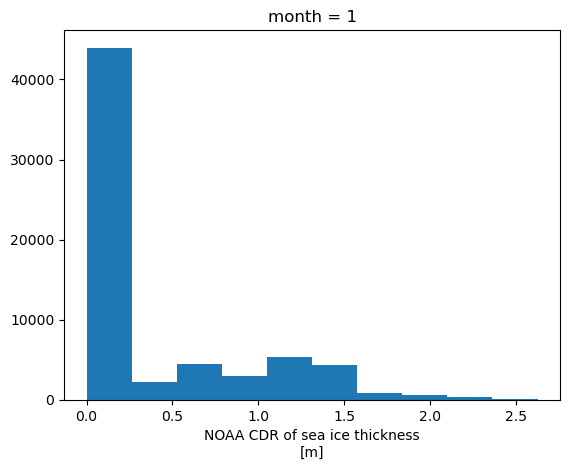

In [12]:
#ds_21_clm['cdr_sea_ice_thickness'][0].plot()


xr.plot.hist(ds_21_clm['cdr_sea_ice_thickness'][0])



### Compute Climatology (historical mean)




In [3]:
# Extract the dataset for the climatological period: 2006-2020
start_date = '2006-01-01'
end_date = '2014-12-31'
ds_hist = ds.sel(time=slice(start_date, end_date)).load()
ds_hist_clm = ds_hist.groupby("time.year").map(lambda x: x.groupby("time.month").mean())
ds_hist_clm['cdr_sea_ice_thickness'].to_netcdf('hist_clm_06_14.nc')
ds_hist_clm.close()

In [8]:
ds_hist_clm['cdr_sea_ice_thickness'].to_netcdf('hist_clm_19_20.nc')
ds_hist_clm.close()


### Compute anomaly 

To understand the recent change in the sea ice thickness, we can compare the current state to the historical statistics.  Anomaly is a commonly used metric representing the difference.

For this exercise, we will use already computed histotrical median for the past 15 year period from 2006 to 2020, and we will compute the monthly anamalies.



In [13]:

# Load the 15th year sea ice thickness mean data
thickness_clm = 'hist_clm_19_20.nc'
ds_21_clm = 'thickness21.nc'
clim_mean = xr.open_dataset(thickness_clm)
ds_21 = xr.open_dataset(ds_21_clm)
ds_21_clm = ds_21.groupby("time.month").mean()
# Compute anomaly of 2021 from the mean data
anom_mean = ds_21_clm['cdr_sea_ice_thickness'] - clim_mean['cdr_sea_ice_thickness']

# Plot Feb and Sep anomaly
#anom_mean.plot()
anom_mean


<xarray.DataArray 'cdr_sea_ice_thickness' (time: 668, rows: 361, columns: 361,
                                           year: 2, month: 12)> Size: 8GB
array([[[[[nan, nan, nan, ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         [[nan, nan, nan, ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         [[nan, nan, nan, ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         ...,

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]],

         [[nan, nan, nan, ..., nan, nan, nan],
          [nan, nan, nan, ..., nan, nan, nan]]],

...

        [[[nan, nan, nan, ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         [[nan, nan, nan, ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         [[nan, nan, nan, ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         ...,

         [[nan, nan, nan, ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         [[nan, nan, nan, ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]],

         [[nan, nan, nan, ...,  0.,  0.,  0.],
          [ 0.,  0.,  0., ...,  0.,  0.,  0.]]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 5kB 2021-01-01T04:00:00 ... 2021-12-01T14:...
  * rows     (rows) float32 1kB -4.5e+06 -4.475e+06 ... 4.5e+06 4.525e+06
  * columns  (columns) float32 1kB -4.525e+06 -4.5e+06 ... 4.475e+06 4.5e+06
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * year     (year) int64 16B 2019 2020

### Compute trends and trend analysis

https://www.geeksforgeeks.org/how-to-perform-a-mann-kendall-trend-test-in-python/

In [14]:
#clim_mean 
ds_21_clm  

<xarray.Dataset> Size: 348MB
Dimensions:                (time: 668, rows: 361, columns: 361)
Coordinates:
  * time                   (time) datetime64[ns] 5kB 2021-01-01T04:00:00 ... ...
  * rows                   (rows) float32 1kB -4.5e+06 -4.475e+06 ... 4.525e+06
  * columns                (columns) float32 1kB -4.525e+06 -4.5e+06 ... 4.5e+06
Data variables:
    cdr_sea_ice_thickness  (time, rows, columns) float32 348MB ...

In [7]:
import xarray as xr

# Load the two datasets
ds1 = xr.open_dataset("hist_clm_06_14.nc")  # Dataset from 2006 to 2014
ds2 = xr.open_dataset("hist_clm_15_20.nc")  # Dataset from 2015 to 2020

# Combine the datasets along the 'time' dimension
combined_ds = xr.concat([ds1, ds2], dim='year')

# Optionally, you can save the combined dataset to a new NetCDF file
combined_ds.to_netcdf("monthlyseaicethickness_2006_2020.nc")

# View the combined dataset
combined_ds


<xarray.Dataset> Size: 94MB
Dimensions:                (year: 15, month: 12, rows: 361, columns: 361)
Coordinates:
  * rows                   (rows) float32 1kB -4.5e+06 -4.475e+06 ... 4.525e+06
  * columns                (columns) float32 1kB -4.525e+06 -4.5e+06 ... 4.5e+06
  * month                  (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * year                   (year) int64 120B 2006 2007 2008 ... 2018 2019 2020
Data variables:
    cdr_sea_ice_thickness  (year, month, rows, columns) float32 94MB 0.0 ... 0.0

In [5]:
ds1

<xarray.Dataset> Size: 56MB
Dimensions:                (rows: 361, columns: 361, month: 12, year: 9)
Coordinates:
  * rows                   (rows) float32 1kB -4.5e+06 -4.475e+06 ... 4.525e+06
  * columns                (columns) float32 1kB -4.525e+06 -4.5e+06 ... 4.5e+06
  * month                  (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
  * year                   (year) int64 72B 2006 2007 2008 ... 2012 2013 2014
Data variables:
    cdr_sea_ice_thickness  (year, month, rows, columns) float32 56MB ...